In [1]:
!pip install pandas matplotlib seaborn numpy


[notice] A new release of pip is available: 23.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
df = pd.read_csv('output.csv')

In [18]:
# Basic info and statistics
basic_info = df.describe(include='all')
basic_info

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
count,800.000000,800,800,414,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000,800
unique,NaN,800,18,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Skrelp,Water,Flying,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,1,112,97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,735
mean,362.813750,NaN,NaN,NaN,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375,NaN
std,208.343798,NaN,NaN,NaN,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129,NaN
min,1.000000,NaN,NaN,NaN,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000,NaN
25%,184.750000,NaN,NaN,NaN,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000,NaN
50%,364.500000,NaN,NaN,NaN,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000,NaN
75%,539.250000,NaN,NaN,NaN,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000,NaN


In [19]:

# Missing values
missing_values = df.isnull().sum()
missing_values

#               0
Name            0
Type 1          0
Type 2        386
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [20]:

# Fill categorical columns with mode
for col in df.select_dtypes(include=['object']).columns:
    df[col].fillna(df[col].mode()[0], inplace=True)


/tmp/ipykernel_255856/159699133.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [21]:
# Confirm no missing values remain
print(df.isnull().sum())

# Save and display first few rows
df.to_csv("pokemon_filled.csv", index=False)
df.head()

#             0
Name          0
Type 1        0
Type 2        0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64


,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,Flying,39,52,43,60,50,65,1,False


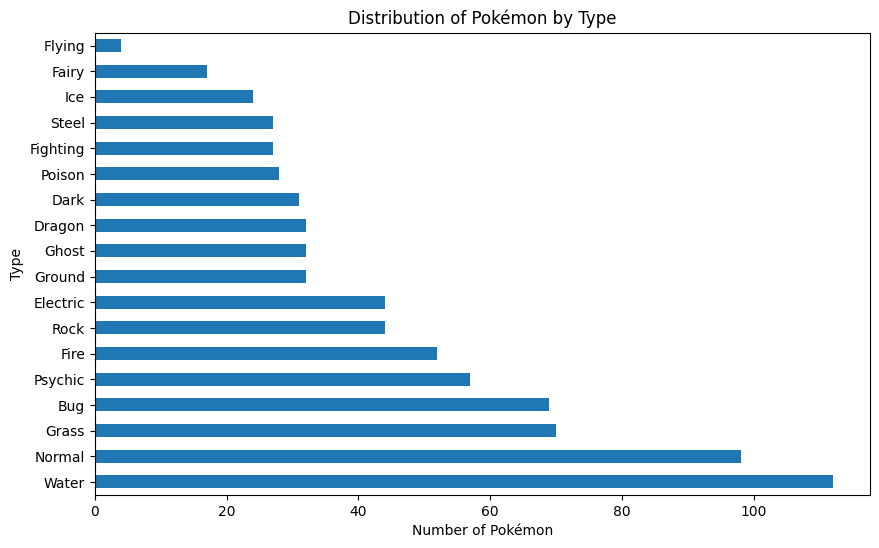

In [22]:

type_counts = df['Type 1'].value_counts()

plt.figure(figsize=(10,6))
type_counts.plot(kind='barh')
plt.xlabel('Number of Pokémon')
plt.ylabel('Type')
plt.title('Distribution of Pokémon by Type')
plt.show()

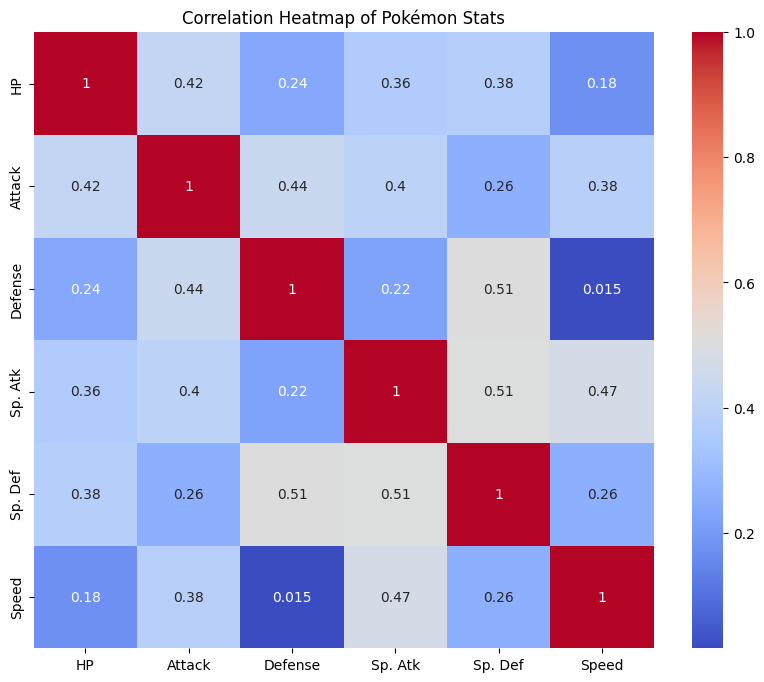

In [23]:
plt.figure(figsize=(10,8))
sns.heatmap(df[['HP','Attack','Defense','Sp. Atk','Sp. Def','Speed']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Pokémon Stats')
plt.show()


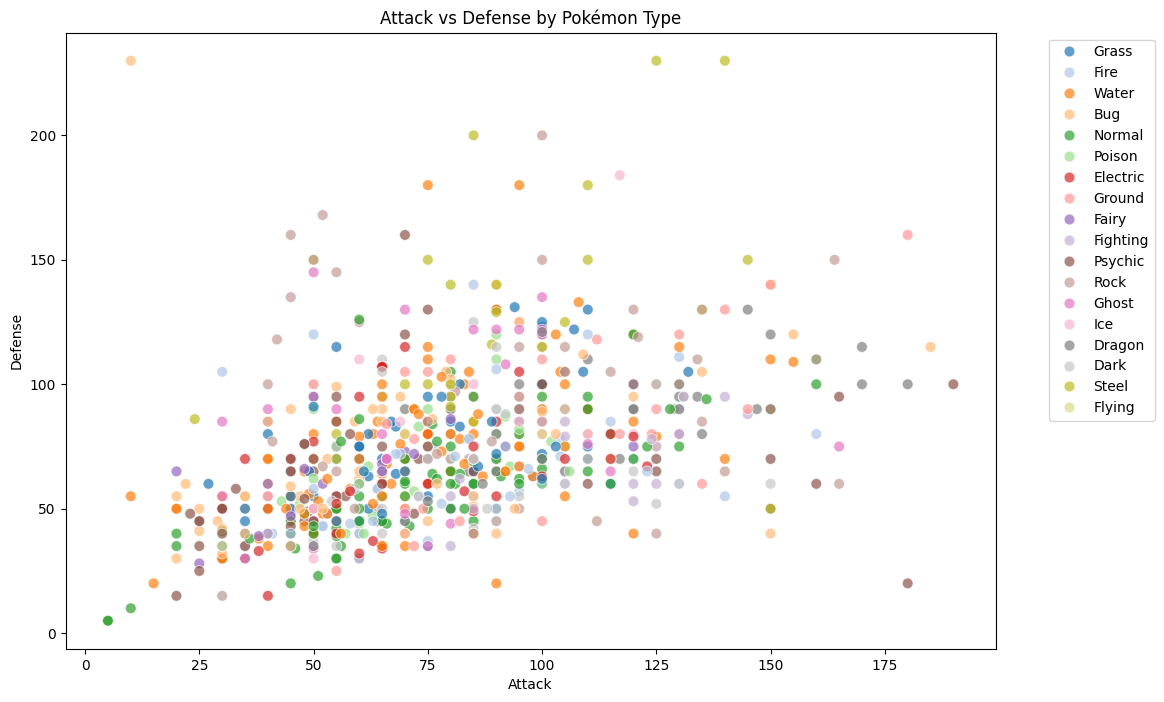

In [24]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Attack', y='Defense', hue='Type 1', data=df, palette='tab20', s=60, alpha=0.7)
plt.title('Attack vs Defense by Pokémon Type')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


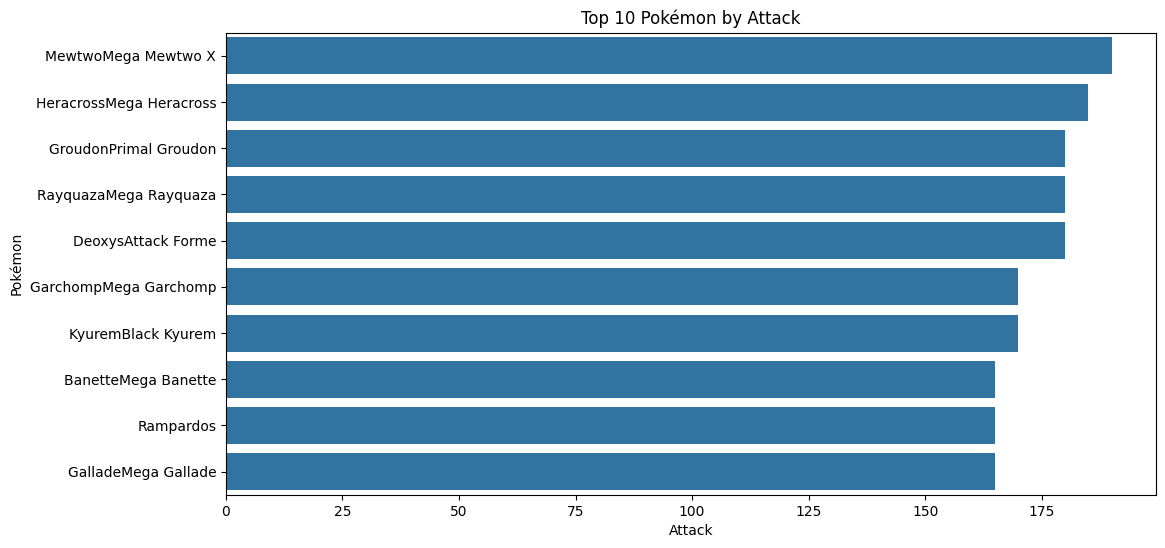

In [25]:
top_10 = df.nlargest(10, 'Attack')

plt.figure(figsize=(12, 6))
sns.barplot(x='Attack', y='Name', data=top_10)
plt.title('Top 10 Pokémon by Attack')
plt.xlabel('Attack')
plt.ylabel('Pokémon')
plt.show()

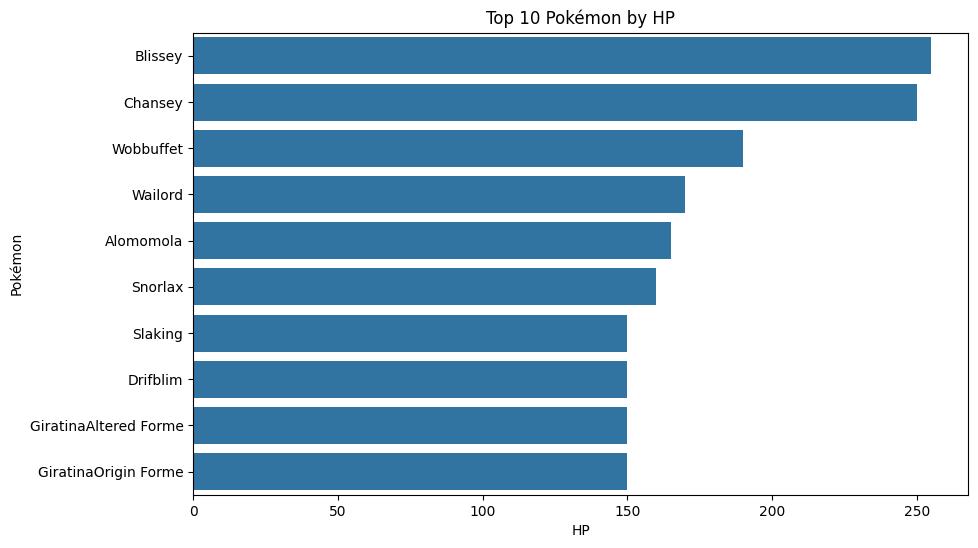

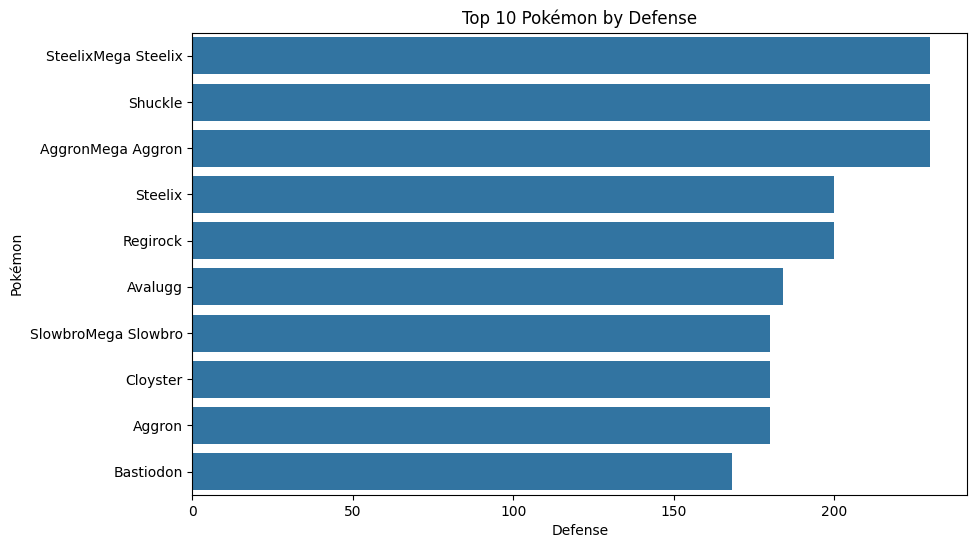

In [26]:
# --- Top 10 by multiple stats ---
stats = ['HP', 'Defense']
for stat in stats:
    top_10 = df.nlargest(10, stat)
    plt.figure(figsize=(10,6))
    sns.barplot(x=stat, y='Name', data=top_10)
    plt.title(f'Top 10 Pokémon by {stat}')
    plt.xlabel(stat)
    plt.ylabel('Pokémon')
    plt.show()